## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Regression - Time factor](#regressiontime)
- [Concluding Remarks](#conclusion)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('The number of rows in the dataset is {}.'.format(df.shape[0]))

The number of rows in the dataset is 294478.


c. The number of unique users in the dataset.

In [4]:
print('The number of unique users in the dataset is {}.'.format(df['user_id'].nunique()))

The number of unique users in the dataset is 290584.


d. The proportion of users converted.

In [5]:
print('The proportion of users converted is {}.'.format(round(df['converted'].mean(),4)))

The proportion of users converted is 0.1197.


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
### the number of times an user in the treatment group is assigned the old page
len_1 = len(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')])

### the number of times an user in the control group is assigned the new page
len_2 = len(df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')])

### the total number of times the treatment and new page do not line up
print('The number of times "new_page" and "treatment" do not line up is {}.'.format(len_1+len_2))

The number of times "new_page" and "treatment" do not line up is 3893.


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### Comment:

As we see from above, no rows have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

### Comment: 
We will remove these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
### remove the rows for users in the treatment group that were assigned the old page
df2 = df.drop(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].index)

### remove the rows for users in the control group that were assigned the new page
df2 = df2.drop(df2[(df2['group'] != 'treatment') & (df2['landing_page'] == 'new_page')].index)

### preview the new dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
unique_users = len(df2.user_id.unique())
print('There are {} unique user ids in the dataframe df2.'.format(unique_users))

There are 290584 unique user ids in the dataframe df2.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
### count the frequency of each user_id and list the results in decreasing order of frequencies
list_users = df2['user_id'].value_counts()
list_users.head()

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

In [12]:
print('The user_id that is repeated is 773192.')

The user_id that is repeated is 773192.


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'] == 773192] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(['user_id'], keep='first')

### check the results
df2[df2['user_id'] == 773192] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
p_all = df2['converted'].mean()

print('The probability of an individual converting is {}.'.format(round(p_all,4)))

The probability of an individual converting is 0.1196.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
### create a new dataframe that contains the entries for the control group only
control_df = df2.query('group == "control"')

### the probability of conversion for the control group
p_control = control_df.query('converted == 1').user_id.nunique()/control_df.user_id.nunique()

print('Probability of conversion for the control group is {}.'.format(round(p_control,4)))

Probability of conversion for the control group is 0.1204.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
### create a new dataframe that contains the entries for the treatment group only
treatment_df = df2.query('group == "treatment"')

### the probability of conversion for the treatment group
p_treatment = treatment_df.query('converted == 1').user_id.nunique()/treatment_df.user_id.nunique()

print('Probability of conversion for the treatment group is {}.'.format(round(p_treatment,4)))

Probability of conversion for the treatment group is 0.1188.


d. What is the probability that an individual received the new page?

In [18]:
p_new = df2.query('landing_page == "new_page"').user_id.nunique()/df2.user_id.nunique()

print('The probability that an individual received the new page is {}.'.format(round(p_new,4)))

The probability that an individual received the new page is 0.5001.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [19]:
### compute the observed difference of conversion probabilities

obs_diff = p_treatment - p_control

print('The observed difference in the conversion rates is {}.'.format(round(obs_diff,4)))

The observed difference in the conversion rates is -0.0016.


### Answer:

For this experiment, the control conversion rate is greater than the treatment conversion rate by about $0.16 \%$. This difference is quite small, it does not support the transition to the new page.

We have the observed difference for a single experiment so far. In order to decide if this difference is statistically significant or just due to chance we need to further investigate, using methods such as bootstraping the sample and eventually computing the corresponding $p$-values or other statistical markers.

<a id='ab_test'></a>
## Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Answer:

*Null Hypothesis*: The new page is no better, or even worse, than the old page.

$$H_0: \hspace{.5cm} p_{new} - p_{old} \leq 0$$

*Alternative Hypothesis*: The new page is better than the old page.

$$H_1: \hspace{.5cm} p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = round(p_all,4)
p_new

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = round(p_all,4)
p_old

0.1196

c. What is $n_{new}$?

In [22]:
n_new = treatment_df.shape[0]
print('The number of individuals in the treatment group is n_new = {}.'.format(n_new))

The number of individuals in the treatment group is n_new = 145310.


d. What is $n_{old}$?

In [23]:
n_old = control_df.shape[0]
print('The number of individuals in the treatment group is n_old = {}.'.format(n_old))

The number of individuals in the treatment group is n_old = 145274.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
### simulate n_new drawings of 0 and 1, where the probability to get a 1 is p_new

new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)]) 
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
### simulate n_old drawings of 0 and 1, where the probability to get a 1 is p_old

old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)]) 
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
### find the difference between the simulated proportions

sim_diff = new_page_converted.mean() - old_page_converted.mean()

print('The difference in the simulated conversion rates is {}.'.format(round(sim_diff,4)))


The difference in the simulated conversion rates is -0.0008.


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)]) 
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
    sim_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(sim_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

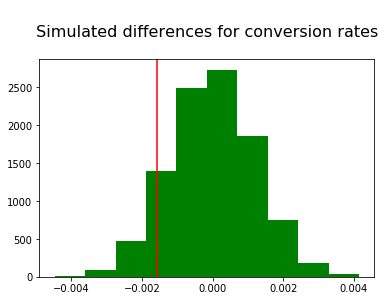

In [28]:
#### a histogram of the simulated conversion rates differences

### the histogram
plt.hist(p_diffs, color='g')

### the title
plt.title('\n Simulated differences for conversion rates \n', fontsize=16)

### place a marker for where our observed difference falls
plt.axvline(x = obs_diff, color='red');

### Answer:

We would expect the sampling distribution to be normal by the Central Limit Theorem, and to have a mean $\mu = 0$. The distribution of our samples is rather normal and centered around zero. The observed difference falls to the left of the mean. We should further investigate the relationship between our statistic and the values from the null.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
### store p_diffs as a numpy.array
diffs = np.array(p_diffs)

### compute the p-value
p_val=(diffs > obs_diff).mean()
print('The p-value for the differences of conversion rates is {}.'.format(round(p_val,4)))

The p-value for the differences of conversion rates is 0.9072.


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### Answer:

We computed the p-value for our statistic. Generally speaking, under the assumption that the null hypothesis is true, the p-value is the probability of obtaining the observed statistic or one more extreme in favor of the alternative. 

We computed the p-value by finding the proportion of values in a simulated distribution under the null hypothesis that were greater than our observed difference. Since this p-value is larger than the threshold p-value of $5 \%$ we fail to reject the null hypothesis. The results are not statistically significant. It seems that company should further investigate these conversion rates. Based on these results there is no difference between the two pages.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm;

### the number of conversions from the old page
convert_old = control_df.query('converted == 1').user_id.nunique()

### the number of conversions from the new page
convert_new = treatment_df.query('converted == 1').user_id.nunique()

print('Conversions from the old_page: {}.'.format(convert_old))
print('Number of rows associated to the old_page: n_old = {}.\n'.format(n_old))

print('Conversions from the new_page: {}.'.format(convert_new))

print('Number of rows associated to the new_page: n_new = {}.'.format(n_new))

Conversions from the old_page: 17489.
Number of rows associated to the old_page: n_old = 145274.

Conversions from the new_page: 17264.
Number of rows associated to the new_page: n_new = 145310.


D:\Anaconda2\envs\py3k\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
### perform a two sample proportion hypothesis testing
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old])

print(' z-score = {}.'. format(round(z_score,4)))
print(' p-value = {}.'. format(round(p_value,4)))


 z-score = -1.3109.
 p-value = 0.1899.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Answer:

We are testing for the difference between the two proportions. In this case the null hypothesis is that there is no difference between the two. The alternative hypothesis is that there is statistical difference between the two proportions.

The z-value gives the number of standard deviations from the mean. In our case the z-value of $-1.31$ is inside the critical z-values interval $(-1.96, 1.96)$ for a $95 \%$ confidence interval. The computed p-value of about $19 \%$ is larger than the corresponding $5 \%$ treshold for this confidence level. 

We fail to reject the null hypothesis. Our results might be very well due to some random observed pattern. Once again (similar to our findings in parts $\bf{j.}$ and $\bf{k.}$) there is no difference between the two pages.

<a id='regression'></a>
## Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Answer:

We will use logistic regression, that is a suitable regression approach to predict only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
### import the necessary libraries

### see https://github.com/statsmodels/statsmodels/issues/3931
### without these we ran into error when getting the models' results
### AttributeError: module 'scipy.stats' has no attribute 'chisqprob' 

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [33]:
### add the intercept column
df2['intercept'] = 1

### create the dummy variables for the group column and store the output
df2[['ba_page','ab_page']] = pd.get_dummies(df2['group'])

### keep only the column in which treatment corresponds to 1 and control to 0 
df2 = df2.drop('ba_page', axis=1)

### check for success
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
logistic_mod_page = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results_page = logistic_mod_page.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results_page.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:06:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### Answer:

The p-value associated to the ab_page is $p = 0.190$, this is smaller than the p-value $p = 0.9068$ calculated in Part II(j). 

In Part II we performed a two-sample test, comparing the conversion rates of the treatment and control groups. The null hypothesis, assumed that `p_new` and `p_old` both are equal to the conversion rate regardless of page. This is a perfectly reasonable way to test the null hypothesis that the conversion rate is not associated to the group the individual is in. 

Using logistic regression allows us to determine whether there is a relationship between the group the individual is in and the conversion rate, and to predict the probability that an individual in the treatment group converts to the old page. 

Regression analysis generates an equation to describe the statistical relationship between a predictor variable (`ab_page`) and the response variable (`converted`). 

The probability of $1$ occuring (conversion) is given by:

$$ \log \left( \frac{p}{1-p} \right) = b_0 + b_1 x_1$$
    
In our case $b_1 = -0.015$.  When in the treatment group, we expect a multiplicative change in the odds of a $1$ (conversion) by a factor of $e^{-0.015} = 1.015$ compared to the control group, holding all the other variables constant.    
    
The p-value for each term tests the null hypothesis that the coefficient is equal to $1$, it has no effect on the response variable (recall that in logistic regression we have to exponentiate the coefficients). A low p-value ($< 0.05$) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to our model because changes in the predictor's value are related to changes in the response variable.

In this case, the p-value suggests that the `ab_page` is not statisticallly significant in predicting if the individual converts to the other page. Thus we fail to reject the null hypothesis.  

Therefore, we reached the same conclusion as in Part II.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Answer:

By looking at the data we notice that we have information on the period of time the experiment was performed. Thus the time factor would be another variable we could include in our regression model. This analysis might give us some insight into how the new page performed over the duration of the experiment, are there any changes in time on how the new page was received? We could also get some insight on how significant the novelty effect is in this case. 

In a logistic regression model, we assume that the logarithm of the odds ratio follows a linear pattern. This is an assumption that might not be appropriate in this case and our predictions will not be accurate. Also, when working with data collected over time we may encounter correlated errors. In this case, if we are unsure if such errors are an issue we might need to perform additional tests. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
### read the csv file into a new dataframe
df_countries = pd.read_csv('./countries.csv')

### preview tthe new dataframe
df_countries.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [37]:
### combine the two dataframes into a new one 
df3 = df2.set_index('user_id').join(df_countries.set_index('user_id'))

### preview the combined dataframe
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [38]:
### find the unique values in the country column

df3.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [39]:
### create dummy variables for the country column

df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()


,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [40]:
### since we do not need all three new columns we drop `CA`

df3 = df3.drop('CA', axis=1)
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


In [41]:
### fit the logistic model for countries
logistic_mod_country = sm.Logit(df3['converted'], df3[['intercept', 'UK','US']])
results_country = logistic_mod_country.fit()

### print the results
results_country.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:               1.521e-05
Time:                        22:06:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

### Comments:

Compare the p-values to observe that the country has some influence on how the new page performs. However, both p-values for `UK` and `US` are still greater than the $5 \%$ threshold and we fail to reject the null hypothesis again. These results are not statistically significant.  

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
### fit the logistic model for page and countries
logistic_mod_pagecountry = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK','US']])
results_pagecountry = logistic_mod_pagecountry.fit()

### print the results
results_pagecountry.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:               2.323e-05
Time:                        22:06:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

### Comments:

We notice that the p-values for the combined model are slightly larger than those values when we looked at the individual factors of country and page. What is relevant is that either way we reach the same conclusion, that we fail to reject the null hypothesis. 

<a id='regressiontime'></a>
## Part IV - Regression - time factor

In this last part of the project we will construct a logistic model based on the `timestamp` column, that will investigate if the time factor plays a significant role in the performance of the new page.

In [43]:
### save the entries in the timestamp column as Python datetime objects
df3['timestamp'] = pd.to_datetime(df3['timestamp'])

### check for success
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 851104 to 715931
Data columns (total 9 columns):
timestamp       290584 non-null datetime64[ns]
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
country         290584 non-null object
UK              290584 non-null uint8
US              290584 non-null uint8
dtypes: datetime64[ns](1), int64(2), object(3), uint8(3)
memory usage: 26.4+ MB


In [44]:
### find the duration of the experiment

df3.sort_values('timestamp').head(2), df3.sort_values('timestamp').tail(2)

(                         timestamp      group landing_page  converted  \
 user_id                                                                 
 922696  2017-01-02 13:42:05.378582  treatment     new_page          0   
 781507  2017-01-02 13:42:15.234051    control     old_page          0   
 
          intercept  ab_page country  UK  US  
 user_id                                      
 922696           1        1      US   0   1  
 781507           1        0      UK   1   0  ,
                          timestamp    group landing_page  converted  \
 user_id                                                               
 836373  2017-01-24 13:41:52.604673  control     old_page          0   
 920411  2017-01-24 13:41:54.460509  control     old_page          0   
 
          intercept  ab_page country  UK  US  
 user_id                                      
 836373           1        0      US   0   1  
 920411           1        0      CA   0   0  )

### Comment:

The experiment lasted from January 2nd, 2017 to January 24, 2017, that is 23 days. We will extract the day information in a separate column `day`. It does not seem practical to run tests for every single day of the experiment, instead we will divide this period into three sub-periods of time, which we will denote as wk1 (2 to 8), wk2 (9 to 16) and wk3 (17 to 24). We will store this information in a new column `period`.

In [45]:
### create a new column `day` which contains only the day from timestamp

df3['day'] = df3['timestamp'].dt.day
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,day
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,21
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,12
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,11
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,8
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,21


In [46]:
### create a simple function that associates to each entry in 'day' the corresponding label
### that will be stored in a new column 'period

def fun_period(row):
    if 2<= row['day'] <= 8:
        val = 'wk1'
    elif 9 <= row['day'] <= 16:
        val = 'wk2'
    else:
        val = 'wk3'
    return val

### create the new column of labels
df3['period'] = df3.apply(fun_period, axis=1)
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,day,period
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,21,wk3
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,12,wk2
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,11,wk2
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,8,wk1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,21,wk3


In [47]:
### create dummy variables for the `period` column

df3[['wk1', 'wk2', 'wk3']] = pd.get_dummies(df3['period'])
df3.head()


,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,day,period,wk1,wk2,wk3
user_id,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,21,wk3,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,12,wk2,0,1,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,11,wk2,0,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,8,wk1,1,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,21,wk3,0,0,1


In [48]:
### we do not need all three new columns, we drop 'wk1'

df3 = df3.drop('wk1', axis=1)

In [49]:
### fit the logistic model for periods of time
logistic_mod_time = sm.Logit(df3['converted'], df3[['intercept', 'wk2','wk3']])
results_time = logistic_mod_time.fit()

### print the results
results_time.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:               1.391e-05
Time:                        22:07:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2276
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0054      0.011   -188.975      0.000      -2.026      -1.985
wk2            0.0038      0.014      0.266      0.790      -0.024       0.032
wk3            0.0225      0.014      1.567      0.117      -0.006       0.051
==============================================================================
"""

In [50]:
### fit the logistic model for page,  countries and periods of time
logistic_mod_full = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK','US', 'wk2', 'wk3']])
results_full = logistic_mod_full.fit()

### print the results
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:               3.716e-05
Time:                        22:07:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1614
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0392      0.028    -72.606      0.000      -2.094      -1.984
ab_page       -0.0149      0.011     -1.305      0.192      -0.037       0.007
UK             0.0507      0.028      1.785      0.074      -0.005       0.106
US             0.0407      0.027      1.514      0.130      -0.012       0.093
wk2            0.0038      0.014      0.265      0.791      -0.024       0.032
wk3            0.0225      0.014      1.567      0.117      -0.006       0.051
==============================================================================
"""

### Comments:

The results for `wk2` and `wk3` do not change significantly if we take the `country` and also the `ab_page` into account. We notice that during the seconnd week of the experiment the chance of conversion to the new page is $1.003 = e^{0.0038}$ more likely than during the first week, while during the third week of the experiment the conversion chance is $1.02 = e^{0.0225}$ more likely than during the first week, while keeping all the other variables fixed. The corresponding p-values are larger than the $5 \%$ threshold. We conclude that we do not have enough evidence to reject the null hypothesis. 
***

<a id='conclusion'></a>
## Concluding remarks:

We are analyzing an A/B test run by an e-commerce website. Two similar sizes groups of individuals are assigned two versions of a certain website (old page to the control group, new page to the treatment group). The duration of the experiment was $23$ days. We are comparing the conversion rates for the two groups.

We computed the observed difference between the conversion rates for the two groups. For this experiment the conversion rate for control group is just slightly larger, by about $0.16 \%$, than the conversion rate for the treatment group. 

First, we performed hypothesis testing. Assuming under the null hypothesis, that the conversion rates are equal, we simulated the sampling distribution under this null hypothesis. We computed the p-value of $0.908$ by finding the proportion of values in the null distribution that were greater than our observed difference. With an $\alpha$-value of $5 \%$, the observed difference is not statistically significant. Therefore we fail to reject the null hypothesis. 

Second, we use logistic regression to fit several versions of the model, that eventually includes the group, the country where the individuals reside and the duration of the experiment. In all these cases, the predictors have large p-values which indicates that they are not meaningful additions to our model. Once again, we fail to reject the null hypothesis.


*Based on our findings we suggest that the company should significantly revise the new website. In addition to this we also recommend to run the experiment for a longer period of time, in order to minimize the novelty effect or to account for seasonal events.*
